# Telangana - Transportation - Vehicle - Sales -Analysis

# Objective : find Answers for the following Questions

## Q1
-  Investigate whether there is any correlation between vehicle sales and 
specific months or seasons in different districts. Are there any months 
or seasons that consistently show higher sale rates, and if yes, what 
could be the driving factors?

## Q2
- . How does the distribution of vehicles vary by vehicle class 
(MotorCycle, MotorCar, AutoRickshaw, Agriculture) across different 
districts? Are there any districts with a predominant preference for a 
specific vehicle class? Consider FY 2022 for analysis.

## Q3
- List down the top 3 and bottom 3 districts that have shown the highest 
and lowest vehicle sales growth during FY 2022 compared to FY 
2021? (Consider and compare categories: Petrol, Diesel and Electric)

## Import Python Modules

In [176]:
# Load necessary pyhton modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# load dataset - vehile sales

In [177]:
df_vehiles_sales = pd.read_csv("dataset/final_transport.csv")

# Basic Inspection on dataset

In [125]:
def basic_inspection(table):
    print("Top 5 Records of dataset")
    print(table.head())
    print()
        
    print("Bottom Records of dataset")
    print(table.tail())
    print()
    
    print("Column/features/Variable  - Names of Given dataset")
    print(table.columns)
    print()
    
    print("Shape(rows x columns) - of Given dataset")
    print(table.shape)
    print()
    
    print("Data types - Given Column Names")
    print(table.dtypes)
    print()
    
    print("Summry of dataset")
    print(table.info())
    print()
    
    print("To see the count of null/nan values in columns of dataset")
    print(table.isnull().value_counts())
    print()
    
    print("Dataset Summary ")
    print(table.describe())
    print()
    


In [126]:
basic_inspection(df_vehiles_sales)

Top 5 Records of dataset
                 dist_code  fuel_type_petrol  fuel_type_diesel  \
0               Rangareddy             17910              3011   
1                Kamareddy              3066               306   
2         Rajanna Sircilla              1577               215   
3                  Jangoan              1961               281   
4  Jayashankar Bhupalpally              1552               309   

   fuel_type_electric  fuel_type_others  vehicleClass_MotorCycle  \
0                  76                22                    15308   
1                   6                 0                     2995   
2                   0                 0                     1546   
3                   2                 0                     1939   
4                   0                 0                     1512   

   vehicleClass_MotorCar  vehicleClass_AutoRickshaw  vehicleClass_Agriculture  \
0                   4429                          0                         4   
1      

# Questions
$Questions - find Answers$

-  Investigate whether there is any correlation between vehicle sales and 
specific months or seasons in different districts. Are there any months 
or seasons that consistently show higher sale rates, and if yes, what 
could be the driving factors?

- . How does the distribution of vehicles vary by vehicle class 
(MotorCycle, MotorCar, AutoRickshaw, Agriculture) across different 
districts? Are there any districts with a predominant preference for a 
specific vehicle class? Consider FY 2022 for analysis.

- List down the top 3 and bottom 3 districts that have shown the highest 
and lowest vehicle sales growth during FY 2022 compared to FY 
2021? (Consider and compare categories: Petrol, Diesel and Electric)


In [127]:
df_vehiles_sales["total_sales"] = df_vehiles_sales[["fuel_type_petrol","fuel_type_diesel", "fuel_type_electric","fuel_type_others"]].sum(axis=1)

# Q1 - Seasons vs vehicle sales

In [128]:
# Grouping and summing
result_df = df_vehiles_sales.groupby([ 'Fiscal_Year']).agg({
    'total_sales': 'sum',
  }).reset_index()

In [129]:
print(result_df)

   Fiscal_Year  total_sales
0         2019      2043571
1         2020      1658209
2         2021      1550305
3         2022      1413692


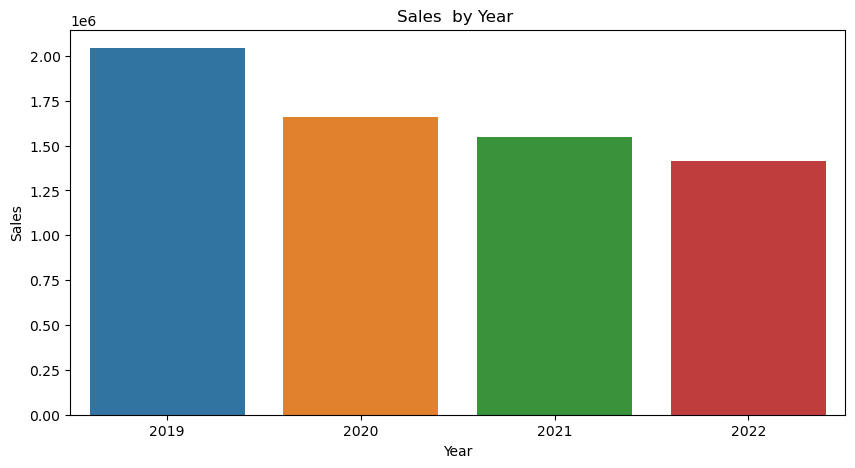

In [130]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Fiscal_Year', y='total_sales', data=result_df)
plt.title('Sales  by Year ')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

In [131]:
result_df = df_vehiles_sales.groupby([ 'Fiscal_Year','Quarter']).agg({
    'total_sales': 'sum',
  }).reset_index()

In [132]:
print(result_df)

    Fiscal_Year Quarter  total_sales
0          2019      Q1       510457
1          2019      Q2       434671
2          2019      Q3       595898
3          2019      Q4       502545
4          2020      Q1       229404
5          2020      Q2       415096
6          2020      Q3       547047
7          2020      Q4       466662
8          2021      Q1       333828
9          2021      Q2       386970
10         2021      Q3       443993
11         2021      Q4       385514
12         2022      Q1       409643
13         2022      Q2       402137
14         2022      Q3       256241
15         2022      Q4       345671


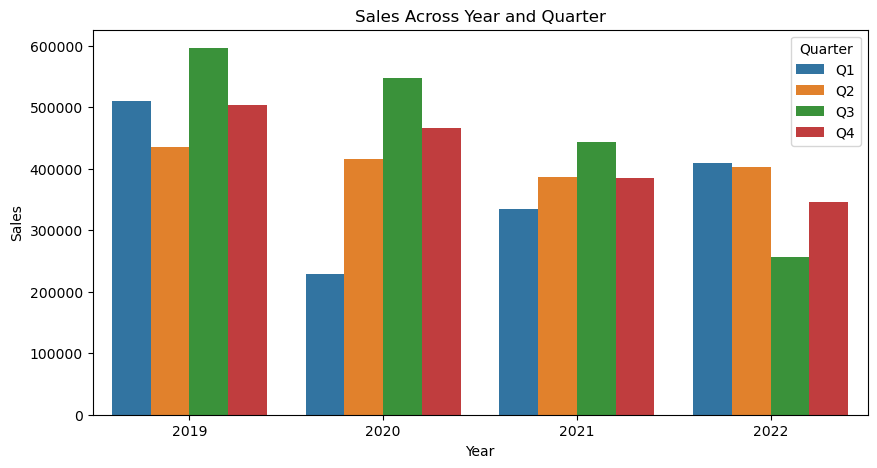

In [133]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Fiscal_Year', y='total_sales', hue='Quarter' ,data=result_df)
plt.title('Sales Across Year and Quarter')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

In [134]:
g=df_vehiles_sales.groupby(['Fiscal_Year'])

In [135]:
g.max()

,dist_code,fuel_type_petrol,fuel_type_diesel,fuel_type_electric,fuel_type_others,vehicleClass_MotorCycle,vehicleClass_MotorCar,vehicleClass_AutoRickshaw,vehicleClass_Agriculture,vehicleClass_others,seatCapacity_1_to_3,seatCapacity_4_to_6,seatCapacity_above_6,Brand_new_vehicles,Pre-owned_vehicles,category_Non-Transport,category_Transport,Month,Quarter,total_sales
Fiscal_Year,,,,,,,,,,,,,,,,,,,,
2019,Yadadri Bhuvanagiri,39689,5270,454,2326,35420,7617,2287,614,4299,36694,7918,984,42073,3404,42074,4239,Sep,Q4,45477
2020,Yadadri Bhuvanagiri,26280,2833,501,591,22699,7811,543,786,1715,23524,7201,733,26017,2717,27369,1780,Sep,Q4,28434
2021,Yadadri Bhuvanagiri,26093,3245,1628,1500,22499,7780,946,745,1722,23314,7032,1111,26560,2778,27809,2512,Sep,Q4,29338
2022,Yadadri Bhuvanagiri,24384,3187,2782,1848,22585,8036,1684,444,2590,23539,7568,1337,26285,4450,27976,3314,Sep,Q4,30735


In [136]:
g.min()

,dist_code,fuel_type_petrol,fuel_type_diesel,fuel_type_electric,fuel_type_others,vehicleClass_MotorCycle,vehicleClass_MotorCar,vehicleClass_AutoRickshaw,vehicleClass_Agriculture,vehicleClass_others,seatCapacity_1_to_3,seatCapacity_4_to_6,seatCapacity_above_6,Brand_new_vehicles,Pre-owned_vehicles,category_Non-Transport,category_Transport,Month,Quarter,total_sales
Fiscal_Year,,,,,,,,,,,,,,,,,,,,
2019,Adilabad,479,145,0,0,465,16,0,0,51,515,52,1,607,12,490,72,Apr,Q1,627
2020,Adilabad,0,0,0,0,0,0,0,0,0,6,0,0,6,0,6,0,Apr,Q1,6
2021,Adilabad,486,67,0,0,471,20,0,0,31,527,26,1,533,10,497,34,Apr,Q1,559
2022,Adilabad,229,62,0,0,207,20,0,0,31,275,33,3,316,15,252,31,Apr,Q1,333


In [137]:
df_vehiles_sales.shape

(1440, 21)

In [138]:
df_vehiles_sales_mt_10000_month = df_vehiles_sales[df_vehiles_sales["total_sales"]>10000]

In [139]:
df_vehiles_sales_mt_10000_month

,dist_code,fuel_type_petrol,fuel_type_diesel,fuel_type_electric,fuel_type_others,vehicleClass_MotorCycle,vehicleClass_MotorCar,vehicleClass_AutoRickshaw,vehicleClass_Agriculture,vehicleClass_others,...,seatCapacity_4_to_6,seatCapacity_above_6,Brand_new_vehicles,Pre-owned_vehicles,category_Non-Transport,category_Transport,Month,Quarter,Fiscal_Year,total_sales
0,Rangareddy,17910,3011,76,22,15308,4429,0,4,1278,...,4182,717,19542,1477,19856,1163,Apr,Q1,2019,21019
18,Hyderabad,24309,2957,284,1540,22081,3749,1518,0,1742,...,5306,698,27121,1969,25973,3117,Apr,Q1,2019,29090
19,Medchal_Malkajgiri,19273,3634,42,16,17309,3871,0,18,1767,...,3684,695,21570,1395,21326,1639,Apr,Q1,2019,22965
36,Medchal_Malkajgiri,18836,3695,69,47,16642,4123,0,14,1868,...,3864,929,21106,1541,20919,1728,May,Q1,2019,22647
38,Hyderabad,24949,3035,83,1755,21847,4028,1705,6,2236,...,5501,806,27738,2084,26018,3804,May,Q1,2019,29822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1385,Hyderabad,10772,946,1048,93,9672,2429,31,0,727,...,2133,591,11030,1829,12147,712,Feb,Q4,2022,12859
1386,Medchal_Malkajgiri,9450,1179,846,125,7943,2691,9,3,952,...,2472,485,10051,1549,10674,926,Feb,Q4,2022,11600
1424,Rangareddy,21146,3017,2003,224,16085,8036,22,30,2217,...,7568,1237,22797,3593,24276,2114,Mar,Q4,2022,26390
1434,Medchal_Malkajgiri,20794,2944,2144,302,17079,6724,31,23,2327,...,6427,1051,22864,3320,23896,2288,Mar,Q4,2022,26184


In [140]:
df_vehiles_sales_mt_10000_month.nunique()

dist_code                      4
fuel_type_petrol             133
fuel_type_diesel             132
fuel_type_electric           119
fuel_type_others             120
vehicleClass_MotorCycle      136
vehicleClass_MotorCar        135
vehicleClass_AutoRickshaw     57
vehicleClass_Agriculture      58
vehicleClass_others          134
seatCapacity_1_to_3          135
seatCapacity_4_to_6          134
seatCapacity_above_6         123
Brand_new_vehicles           135
Pre-owned_vehicles           134
category_Non-Transport       136
category_Transport           132
Month                         12
Quarter                        4
Fiscal_Year                    4
total_sales                  135
dtype: int64

In [141]:
df_vehiles_sales_mt_10000_month["dist_code"].unique()

array(['Rangareddy', 'Hyderabad', 'Medchal_Malkajgiri', 'Warangal'],
      dtype=object)

In [142]:
result_df = df_vehiles_sales_mt_10000_month.groupby([ 'Fiscal_Year',"dist_code","Quarter"]).agg({
    'total_sales': 'sum',
  }).reset_index()

In [143]:
print(result_df)

    Fiscal_Year           dist_code Quarter  total_sales
0          2019           Hyderabad      Q1        92454
1          2019           Hyderabad      Q2        87878
2          2019           Hyderabad      Q3       102913
3          2019           Hyderabad      Q4        78459
4          2019  Medchal_Malkajgiri      Q1        69782
5          2019  Medchal_Malkajgiri      Q2        64184
6          2019  Medchal_Malkajgiri      Q3        85977
7          2019  Medchal_Malkajgiri      Q4        65505
8          2019          Rangareddy      Q1        65517
9          2019          Rangareddy      Q2        61055
10         2019          Rangareddy      Q3        83629
11         2019          Rangareddy      Q4        61857
12         2019            Warangal      Q3        10623
13         2020           Hyderabad      Q1        17482
14         2020           Hyderabad      Q2        54555
15         2020           Hyderabad      Q3        79683
16         2020           Hyder

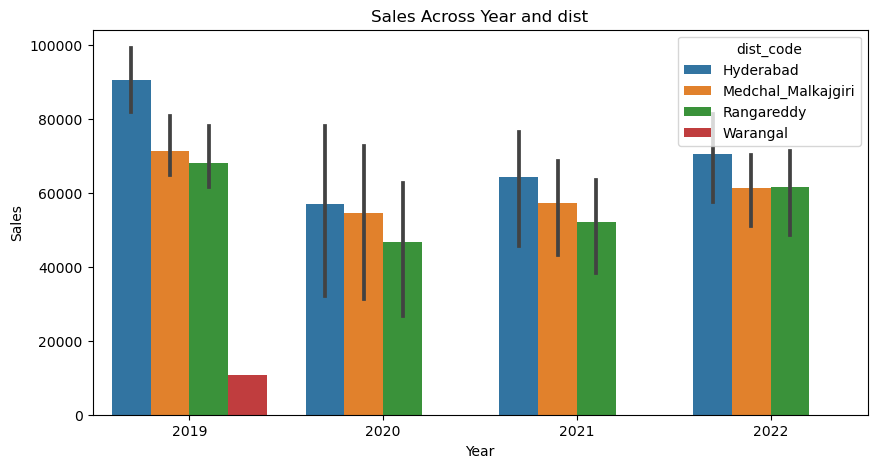

In [144]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Fiscal_Year', y='total_sales', hue='dist_code' ,data=result_df)
plt.title('Sales Across Year and dist')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

In [145]:
result_2019 = result_df[result_df["Fiscal_Year"]==2019]

In [146]:
result_2019

,Fiscal_Year,dist_code,Quarter,total_sales
0,2019,Hyderabad,Q1,92454
1,2019,Hyderabad,Q2,87878
2,2019,Hyderabad,Q3,102913
3,2019,Hyderabad,Q4,78459
4,2019,Medchal_Malkajgiri,Q1,69782
5,2019,Medchal_Malkajgiri,Q2,64184
6,2019,Medchal_Malkajgiri,Q3,85977
7,2019,Medchal_Malkajgiri,Q4,65505
8,2019,Rangareddy,Q1,65517
9,2019,Rangareddy,Q2,61055


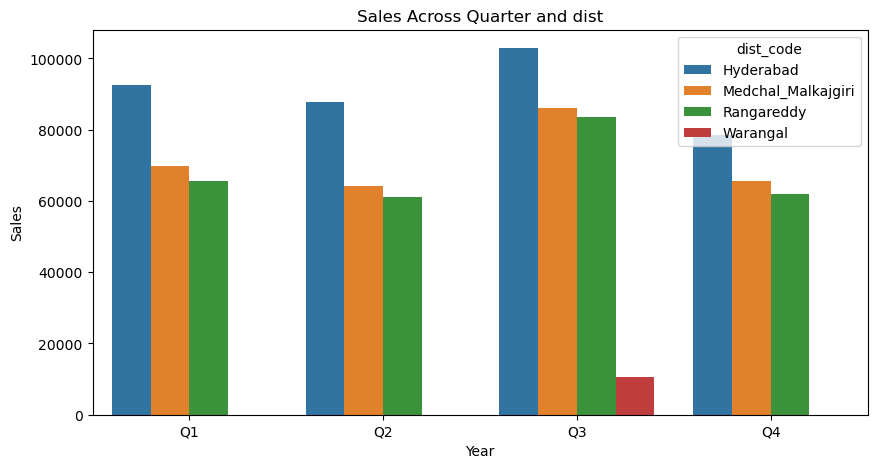

In [147]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Quarter', y='total_sales', hue='dist_code' ,data=result_2019)
plt.title('Sales Across Quarter and dist')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

In [148]:
result_2020 = result_df[result_df["Fiscal_Year"]==2020]

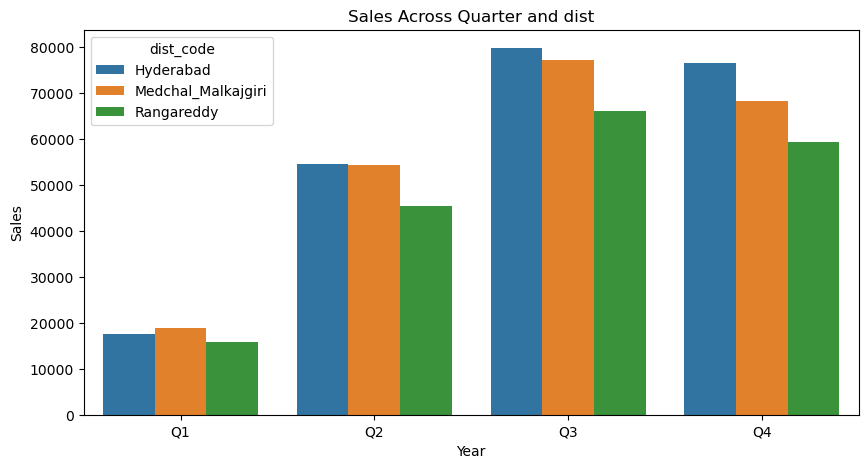

In [149]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Quarter', y='total_sales', hue='dist_code' ,data=result_2020)
plt.title('Sales Across Quarter and dist')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

In [150]:
result_2021 = result_df[result_df["Fiscal_Year"]==2021]

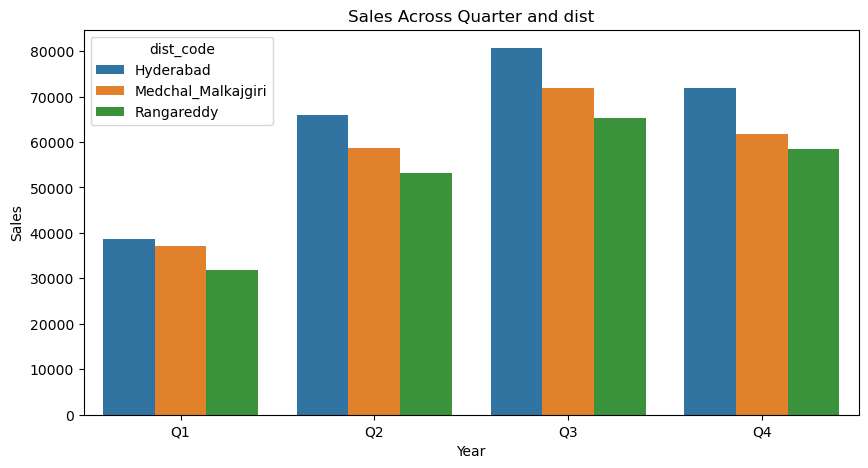

In [151]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Quarter', y='total_sales', hue='dist_code' ,data=result_2021)
plt.title('Sales Across Quarter and dist')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

In [152]:
result_2022 = result_df[result_df["Fiscal_Year"]==2022]

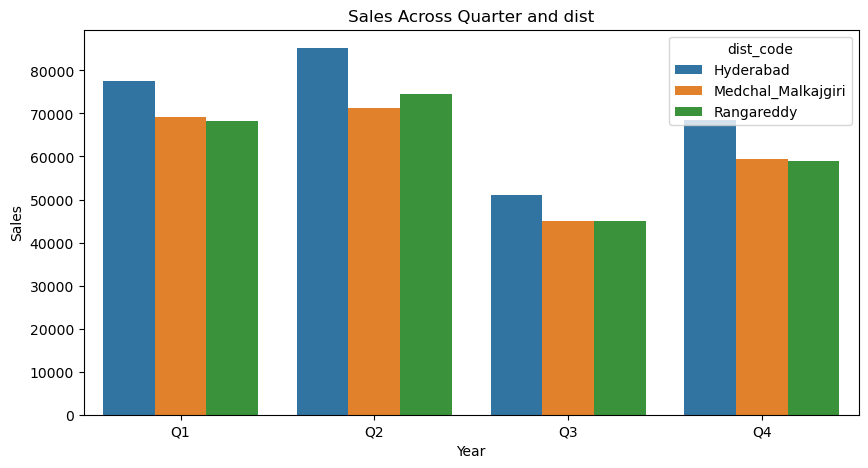

In [153]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Quarter', y='total_sales', hue='dist_code' ,data=result_2022)
plt.title('Sales Across Quarter and dist')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

# Q 1 - Conclusions
$observations$
- 2019, 2020, 2021 - Q3 is domination in sales , But in 2022 , Q3 is lowest sales compared to Q1,Q2 and Q4 
- Top 3 districes in top sales are Hyderabad, Medchal-Malkajgiri and Rangareddy
- Q3 is Season (Oct - Nov - Dec) - Will be the top Sales Season
- Overall Sales in TS from 2019,2020,2021,2022 - are decreasing / falling 

# Q 2
- . How does the distribution of vehicles vary by vehicle class 
(MotorCycle, MotorCar, AutoRickshaw, Agriculture) across different 
districts? Are there any districts with a predominant preference for a 
specific vehicle class? Consider FY 2022 for analysis.


In [154]:
df_vehiles_sales_2022 = df_vehiles_sales[df_vehiles_sales["Fiscal_Year"]==2022]

In [155]:
df_vehiles_sales_2022

,dist_code,fuel_type_petrol,fuel_type_diesel,fuel_type_electric,fuel_type_others,vehicleClass_MotorCycle,vehicleClass_MotorCar,vehicleClass_AutoRickshaw,vehicleClass_Agriculture,vehicleClass_others,...,seatCapacity_4_to_6,seatCapacity_above_6,Brand_new_vehicles,Pre-owned_vehicles,category_Non-Transport,category_Transport,Month,Quarter,Fiscal_Year,total_sales
1080,Wanaparthy,936,312,16,2,872,106,10,50,228,...,104,14,1230,36,1038,228,Apr,Q1,2022,1266
1081,Jayashankar Bhupalpally,1291,211,34,2,1211,127,16,129,55,...,132,18,1481,57,1469,69,Apr,Q1,2022,1538
1082,Mahabubnagar,2185,433,55,8,2004,283,26,74,294,...,301,39,2538,143,2375,306,Apr,Q1,2022,2681
1083,Siddipet,2034,521,44,38,1834,311,22,213,257,...,316,52,2518,119,2363,274,Apr,Q1,2022,2637
1084,Nagarkurnool,1489,383,24,4,1356,184,11,88,261,...,219,25,1836,64,1634,266,Apr,Q1,2022,1900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,Hyderabad,24112,2169,2606,1848,21501,5792,1684,0,1758,...,7139,1093,26285,4450,27421,3314,Mar,Q4,2022,30735
1436,Wanaparthy,996,286,20,67,884,137,75,106,167,...,219,27,1300,69,1129,240,Mar,Q4,2022,1369
1437,Rajanna Sircilla,886,183,71,12,828,146,17,54,107,...,167,19,1060,92,1030,122,Mar,Q4,2022,1152
1438,Yadadri Bhuvanagiri,1659,472,39,97,1413,289,95,182,288,...,391,47,2107,160,1889,378,Mar,Q4,2022,2267


In [156]:
result_df = df_vehiles_sales_2022.groupby([ "dist_code"]).agg({
    'vehicleClass_MotorCycle': 'sum',
    'vehicleClass_MotorCar':'sum',
    'vehicleClass_AutoRickshaw':'sum',
    'vehicleClass_Agriculture':'sum'
        
  }).reset_index()

In [157]:
result_df

,dist_code,vehicleClass_MotorCycle,vehicleClass_MotorCar,vehicleClass_AutoRickshaw,vehicleClass_Agriculture
0,Adilabad,10410,1416,368,467
1,Bhadradri Kothagudem,17022,3157,1388,2013
2,Hyderabad,206819,51447,8397,20
3,Jagtial,13639,2055,272,858
4,Jangoan,8617,1177,397,1225
5,Jayashankar Bhupalpally,9225,1343,218,1928
6,Jogulamba Gadwal,10300,899,116,868
7,Kamareddy,15184,2153,379,748
8,Karimnagar,19411,4818,1042,999
9,Khammam,27385,5880,2690,2121


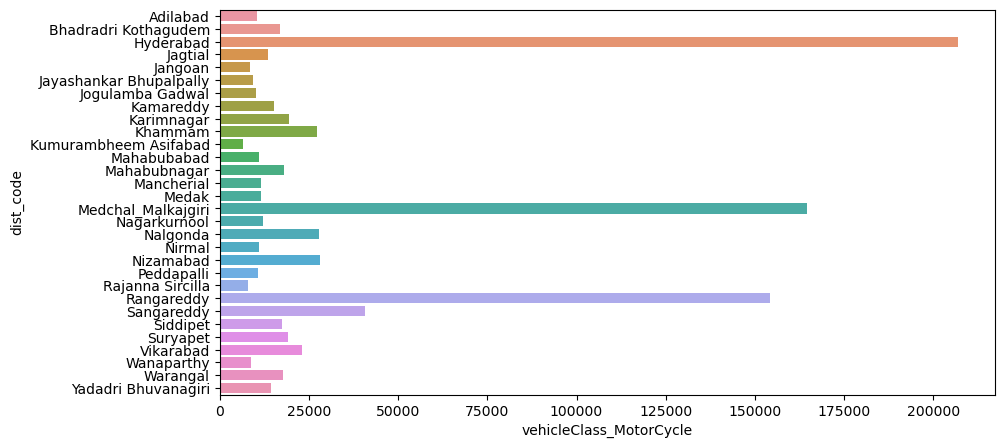

In [158]:
plt.figure(figsize=(10, 5))
sns.barplot(x='vehicleClass_MotorCycle',  y='dist_code' ,data=result_df)
plt.show()

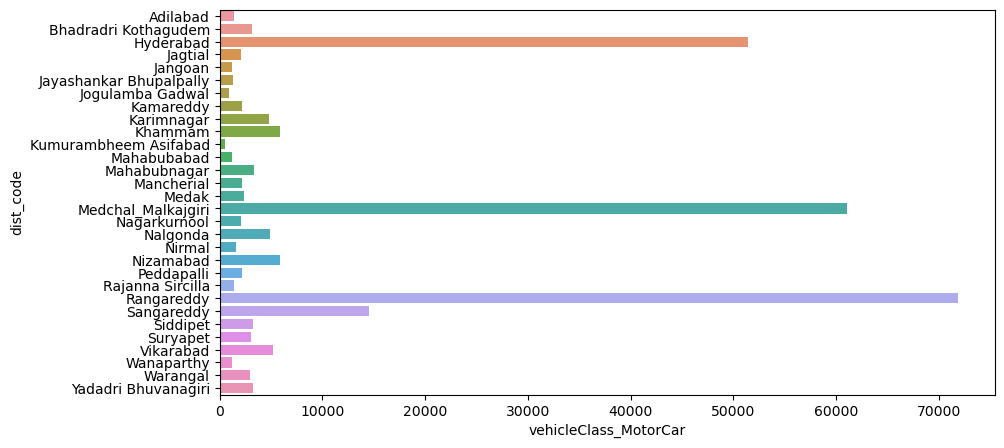

In [159]:
plt.figure(figsize=(10, 5))
sns.barplot(x='vehicleClass_MotorCar',  y='dist_code' ,data=result_df)
plt.show()

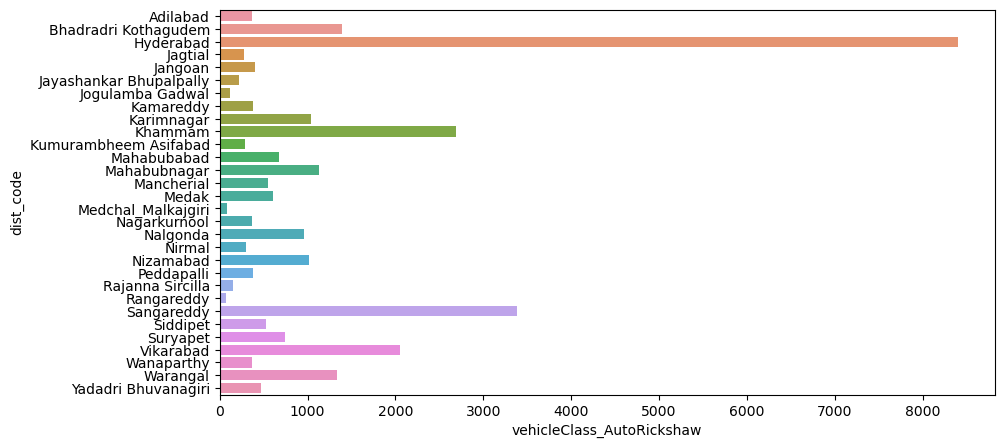

In [160]:
plt.figure(figsize=(10, 5))
sns.barplot(x='vehicleClass_AutoRickshaw',  y='dist_code' ,data=result_df)
plt.show()

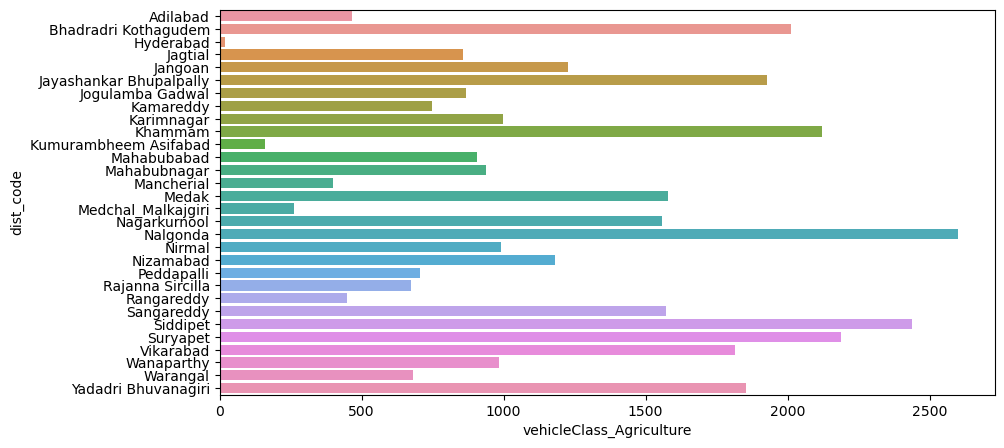

In [161]:
plt.figure(figsize=(10, 5))
sns.barplot(x='vehicleClass_Agriculture',  y='dist_code' ,data=result_df)
plt.show()

# Q 2 - Conclusions
$observations$
- vehicleClass_MotorCycle in 2022 , Top 3 Districes in Sales - Hyderabad, Malkajgiri and Rangareddy
- vehicleClass_MotorCar in 2022 , Top 4 Districes in Sales - Rangareddy, Malkajgiri , Hyderabad and Sangareddy
- vehicleClass_AutoRickshaw in 2022, Top 4 Districes in Sales - Hyderabad, Sangareddy, Khammam, Vikarabad
- vehicleClass_Agriculture in 2022 , Top 4 Distirces in Sales - Nalgonda, Siddipet , Suryapet and Khammam

# Q 3
- List down the top 3 and bottom 3 districts that have shown the highest 
and lowest vehicle sales growth during FY 2022 compared to FY 
2021? (Consider and compare categories: Petrol, Diesel and Electric)


In [162]:
df_vehiles_sales_2022 = df_vehiles_sales[df_vehiles_sales["Fiscal_Year"]==2022][["dist_code","fuel_type_petrol","fuel_type_diesel", "fuel_type_electric"]]

In [163]:
df_vehiles_sales_2022

,dist_code,fuel_type_petrol,fuel_type_diesel,fuel_type_electric
1080,Wanaparthy,936,312,16
1081,Jayashankar Bhupalpally,1291,211,34
1082,Mahabubnagar,2185,433,55
1083,Siddipet,2034,521,44
1084,Nagarkurnool,1489,383,24
...,...,...,...,...
1435,Hyderabad,24112,2169,2606
1436,Wanaparthy,996,286,20
1437,Rajanna Sircilla,886,183,71
1438,Yadadri Bhuvanagiri,1659,472,39


In [164]:
df_vehiles_sales_2021 = df_vehiles_sales[df_vehiles_sales["Fiscal_Year"]==2021][["dist_code","fuel_type_petrol","fuel_type_diesel", "fuel_type_electric"]]

In [165]:
df_vehiles_sales_2021

,dist_code,fuel_type_petrol,fuel_type_diesel,fuel_type_electric
720,Jangoan,990,285,0
721,Jayashankar Bhupalpally,1750,360,10
722,Mahabubnagar,3301,661,19
723,Siddipet,1893,474,6
724,Nagarkurnool,1718,539,2
...,...,...,...,...
1075,Suryapet,2267,706,34
1076,Nalgonda,3127,736,73
1077,Kamareddy,1949,193,44
1078,Rangareddy,17657,2930,1142


In [166]:
# Merge the two DataFrames on the 'District' column
merged_df = pd.merge(df_vehiles_sales_2021, df_vehiles_sales_2022, on='dist_code', suffixes=('_2021', '_2022'))

In [167]:
merged_df

,dist_code,fuel_type_petrol_2021,fuel_type_diesel_2021,fuel_type_electric_2021,fuel_type_petrol_2022,fuel_type_diesel_2022,fuel_type_electric_2022
0,Jangoan,990,285,0,1040,177,22
1,Jangoan,990,285,0,869,280,20
2,Jangoan,990,285,0,953,390,9
3,Jangoan,990,285,0,854,251,12
4,Jangoan,990,285,0,939,174,14
...,...,...,...,...,...,...,...
4315,Karimnagar,2267,787,158,1137,267,73
4316,Karimnagar,2267,787,158,1368,265,44
4317,Karimnagar,2267,787,158,1919,410,114
4318,Karimnagar,2267,787,158,1021,182,63


In [168]:
# Calculate sales growth for each fuel type
fuel_types = ['fuel_type_petrol', 'fuel_type_diesel', 'fuel_type_electric']
for fuel_type in fuel_types:
    merged_df[f'{fuel_type}_Growth'] = ((merged_df[f'{fuel_type}_2022'] - merged_df[f'{fuel_type}_2021']) / merged_df[f'{fuel_type}_2021']) * 100

In [169]:
merged_df

,dist_code,fuel_type_petrol_2021,fuel_type_diesel_2021,fuel_type_electric_2021,fuel_type_petrol_2022,fuel_type_diesel_2022,fuel_type_electric_2022,fuel_type_petrol_Growth,fuel_type_diesel_Growth,fuel_type_electric_Growth
0,Jangoan,990,285,0,1040,177,22,5.050505,-37.894737,inf
1,Jangoan,990,285,0,869,280,20,-12.222222,-1.754386,inf
2,Jangoan,990,285,0,953,390,9,-3.737374,36.842105,inf
3,Jangoan,990,285,0,854,251,12,-13.737374,-11.929825,inf
4,Jangoan,990,285,0,939,174,14,-5.151515,-38.947368,inf
...,...,...,...,...,...,...,...,...,...,...
4315,Karimnagar,2267,787,158,1137,267,73,-49.845611,-66.073698,-53.797468
4316,Karimnagar,2267,787,158,1368,265,44,-39.655933,-66.327827,-72.151899
4317,Karimnagar,2267,787,158,1919,410,114,-15.350684,-47.903431,-27.848101
4318,Karimnagar,2267,787,158,1021,182,63,-54.962506,-76.874206,-60.126582


In [170]:
merged_df.sort_values(by="fuel_type_petrol_Growth",ascending=False)["dist_code"].head(10)

2320            Rangareddy
2327            Rangareddy
2318            Rangareddy
2608             Hyderabad
2615             Hyderabad
2321            Rangareddy
2606             Hyderabad
2609             Hyderabad
2759    Medchal_Malkajgiri
2750    Medchal_Malkajgiri
Name: dist_code, dtype: object

In [171]:
merged_df.sort_values(by="fuel_type_petrol_Growth",ascending=True)["dist_code"].head(10)

2218                 Warangal
2215                 Warangal
2203                 Warangal
2206                 Warangal
2191                 Warangal
2194                 Warangal
3392    Kumurambheem Asifabad
1951         Rajanna Sircilla
2216                 Warangal
2204                 Warangal
Name: dist_code, dtype: object

In [172]:
merged_df.sort_values(by="fuel_type_diesel_Growth",ascending=False)["dist_code"].head(40)

4261    Karimnagar
4189    Karimnagar
4260    Karimnagar
4285    Karimnagar
4273    Karimnagar
4188    Karimnagar
4225    Karimnagar
4262    Karimnagar
4237    Karimnagar
4284    Karimnagar
4272    Karimnagar
4190    Karimnagar
4224    Karimnagar
4236    Karimnagar
4263    Karimnagar
4213    Karimnagar
4286    Karimnagar
4274    Karimnagar
4177    Karimnagar
3911      Adilabad
4297    Karimnagar
4191    Karimnagar
4226    Karimnagar
4212    Karimnagar
4238    Karimnagar
4249    Karimnagar
4287    Karimnagar
4176    Karimnagar
4275    Karimnagar
3909      Adilabad
4296    Karimnagar
2029     Kamareddy
4227    Karimnagar
2125     Kamareddy
4248    Karimnagar
4214    Karimnagar
4239    Karimnagar
4178    Karimnagar
2137     Kamareddy
3901      Adilabad
Name: dist_code, dtype: object

In [173]:
merged_df.sort_values(by="fuel_type_diesel_Growth",ascending=True)["dist_code"].head(10)

2194            Warangal
2206            Warangal
2191            Warangal
2192            Warangal
34               Jangoan
2188            Warangal
3058               Medak
2190            Warangal
1906    Rajanna Sircilla
2203            Warangal
Name: dist_code, dtype: object

In [174]:
merged_df.sort_values(by="fuel_type_electric_Growth",ascending=False)["dist_code"].head(20)

0           Jangoan
1174     Peddapalli
1166     Peddapalli
1167     Peddapalli
1168     Peddapalli
1169     Peddapalli
1170     Peddapalli
1171     Peddapalli
1172     Peddapalli
1173     Peddapalli
1175     Peddapalli
3687    Mahabubabad
3696    Mahabubabad
3695    Mahabubabad
3694    Mahabubabad
3693    Mahabubabad
3692    Mahabubabad
3691    Mahabubabad
3690    Mahabubabad
3689    Mahabubabad
Name: dist_code, dtype: object

In [175]:
merged_df.sort_values(by="fuel_type_electric_Growth",ascending=True)["dist_code"].head(20)

3733                Mahabubabad
3721                Mahabubabad
3709                Mahabubabad
3673                Mahabubabad
2150                  Kamareddy
698                Nagarkurnool
4020                   Adilabad
3734                Mahabubabad
3722                Mahabubabad
4022                   Adilabad
1149           Jogulamba Gadwal
1145           Jogulamba Gadwal
2138                  Kamareddy
428                Mahabubnagar
266     Jayashankar Bhupalpally
4008                   Adilabad
3017        Yadadri Bhuvanagiri
3022        Yadadri Bhuvanagiri
3019        Yadadri Bhuvanagiri
4010                   Adilabad
Name: dist_code, dtype: object

# Q 3 - Conlusons
$observations$
- fuel_type_petrol - FY 2022 compared to FY 2021 , Top  3 in Growth - Warangal,  Asifabad and Siricila
- fuel_type_petrol - FY 2022 compared to FY 2021 , Bottom  3 in Growth - Rangareddy,  Hyderabad and Medchal_Malkajgiri

-

- fuel_type_diesel - FY 2022 compared to FY 2021, Top  3 in Growth - Warangal,  Jangoan and Medak
- fuel_type_diesel - FY 2022 compared to FY 2021, Bottom  3 in Growth - Karimnagar,  Adilabad and Kamareddy

-

- fuel_type_electric - FY 2022 compared to FY 2021 , Top  3 in Growth - Mahabubabad,  Kamareddy and Nagarkurnool
- fuel_type_electric - FY 2022 compared to FY 2021 , Bottom  3 in Growth - Jangoan,  Peddapalli 

